# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [1]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
  0% 0.00/4.75M [00:00<?, ?B/s]
100% 4.75M/4.75M [00:00<00:00, 85.9MB/s]
Archive:  bus-breakdown-and-delays.zip
  inflating: Bus_Breakdown_and_Delays.csv  


## Importing Libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [5]:
df.head( )

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
#drop
Busbreakdown_ID
#split
How_Long_Delayed: 10MINUTES	,10 minutes
#

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [7]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [8]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
df['Busbreakdown_ID'].unique()

array([1224901, 1225098, 1215800, ..., 1353044, 1353045, 1353046])

In [ ]:
df['Number_Of_Students_On_The_Bus'].unique()

array([   5,    3,   12,   11,    4,    0,    2,    1,    6,   15,   18,
          8,    7,   13,   20,    9,   14,   23,   10,   50,   22, 1492,
         19,   25,   17,   26,   44,   27,   31, 1424,   16,   30,   46,
        207,  102, 1011,   21, 1401,   28,   33, 1371,   37,   76,   52,
         40,   24,   51, 1465, 1329,   32,   65,   29, 1472,   47,   35,
       1315, 1749,   43, 1420, 1352, 1500,   60,   45, 1449,   41,  500,
       2368,  138,  156, 9007, 2154,   36,   55, 2312, 4802,   38,   42,
         48, 2045,  430,  610, 5554, 3112, 2680,   49, 2844,   39,   34,
       4533,   63, 6219, 2252, 1240,   66,   53, 2085,   54,  105, 2905,
        209,  157,  172, 2365,   58, 1177,   81,  612,  109,  331, 1331,
         91, 2063, 1402, 1434, 1411, 5718, 2550, 2327, 6209, 2346, 1384,
        280, 2855])

In [ ]:
numeric_col

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
0,1224901,5
1,1225098,3
2,1215800,12
3,1215511,11
4,1215828,12
...,...,...
147967,1338452,7
147968,1341521,0
147969,1353044,0
147970,1353045,0


In [9]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [ ]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINUTES',' ')

In [ ]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode())


In [ ]:
df['How_Long_Delayed'].isnull().sum()

21630

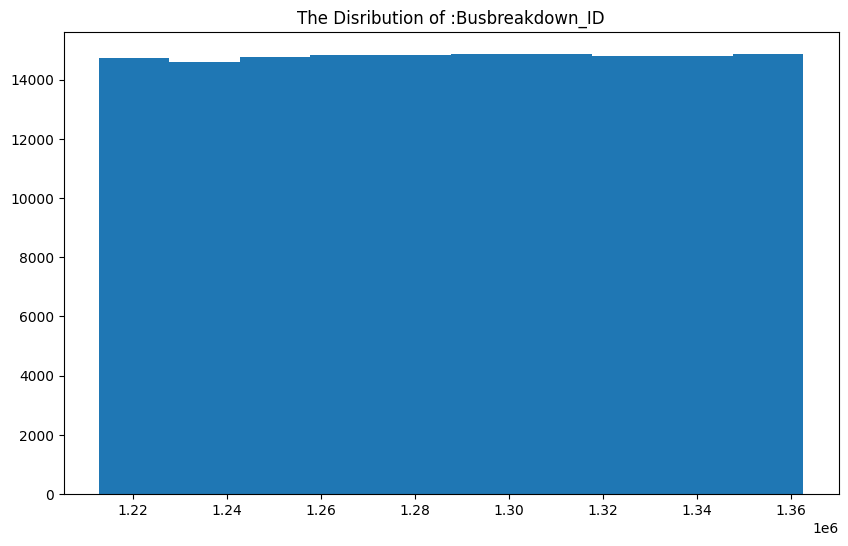

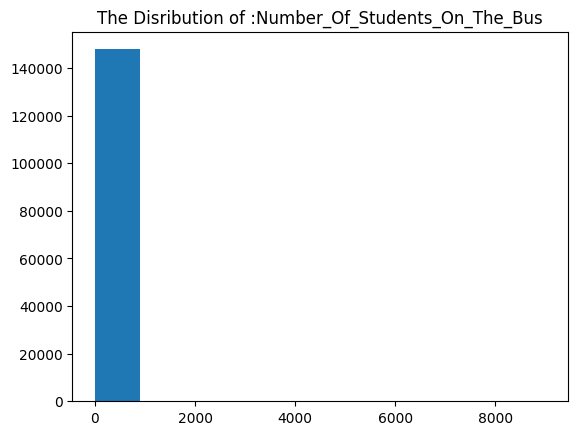

In [10]:
#Distribution of features
numeric_col = df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
for i in numeric_col:
  plt.hist(numeric_col[i],bins=10)
  plt.title('The Disribution of :'+ str(i))
  plt.show()

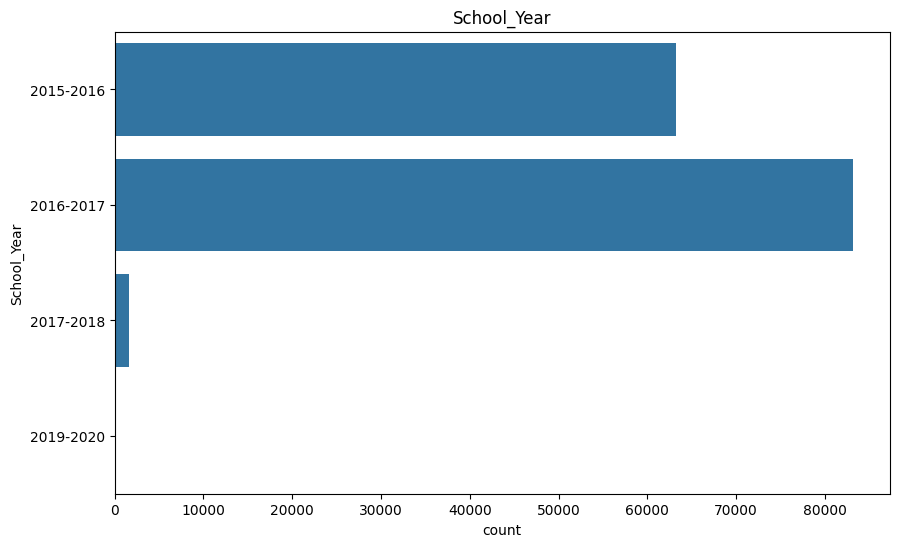

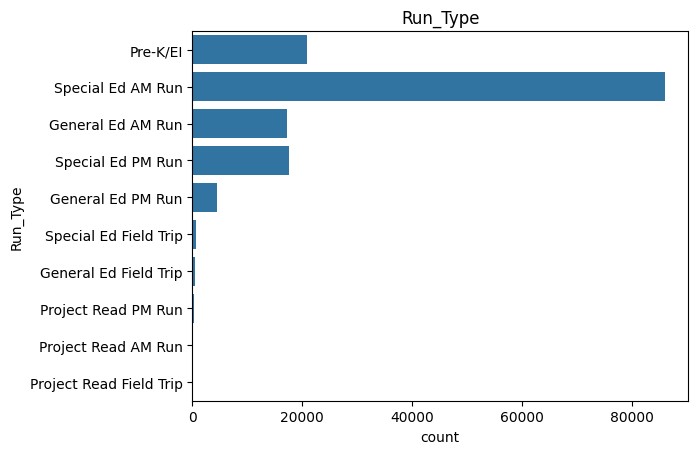

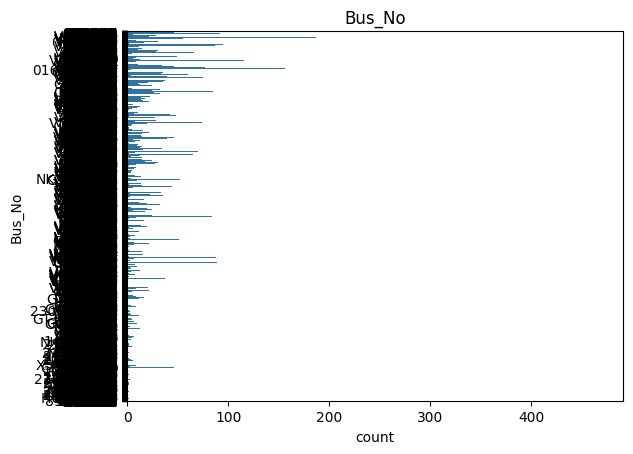

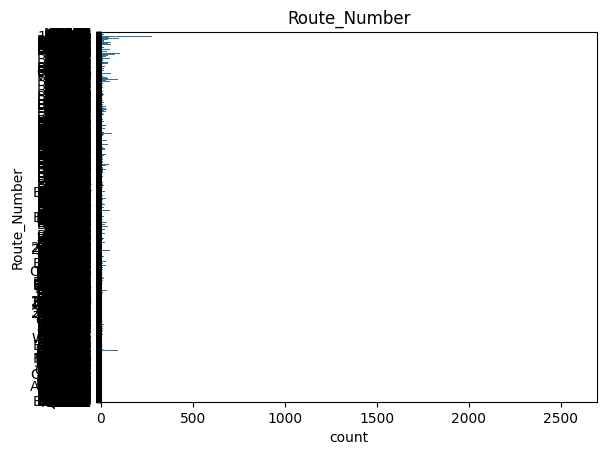

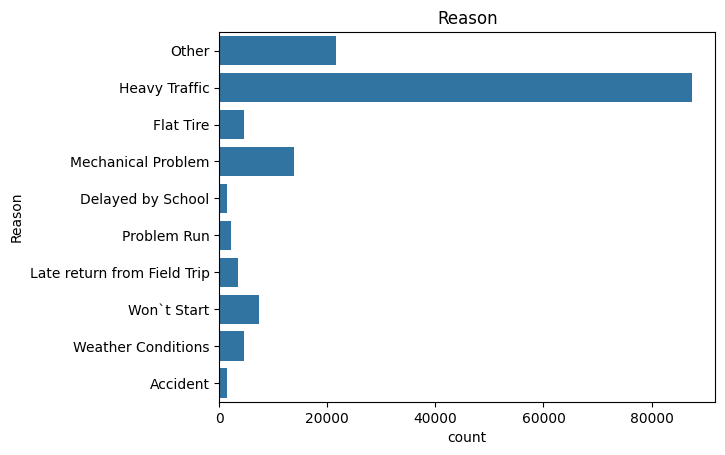

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


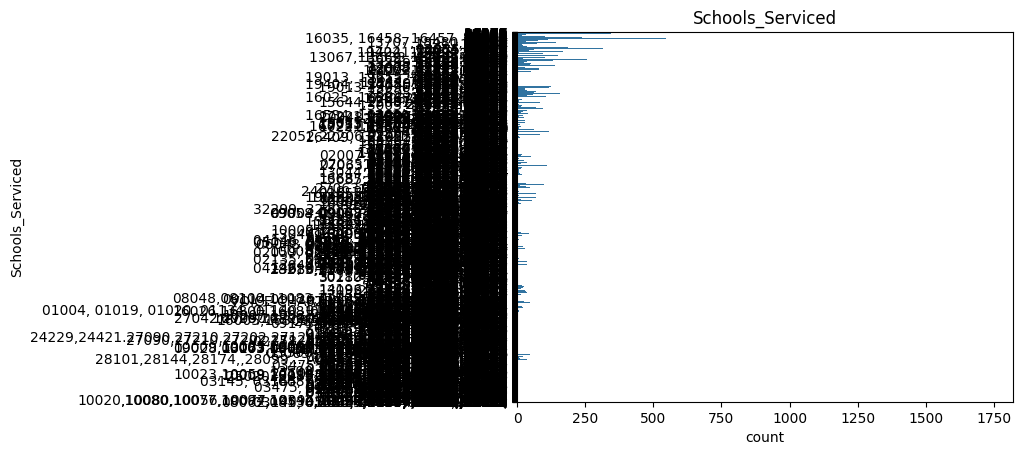

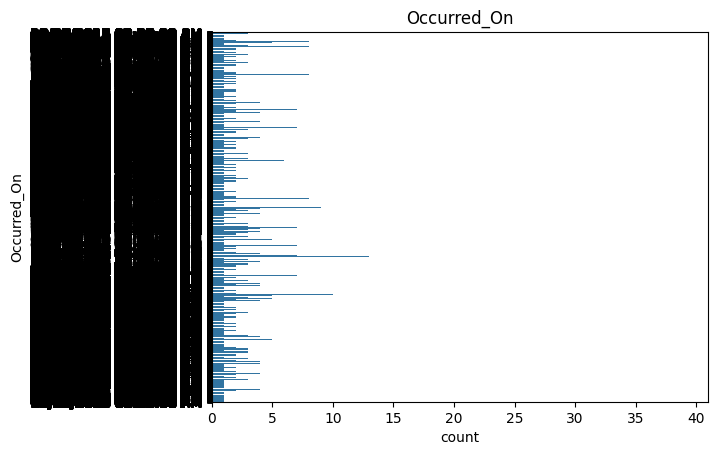

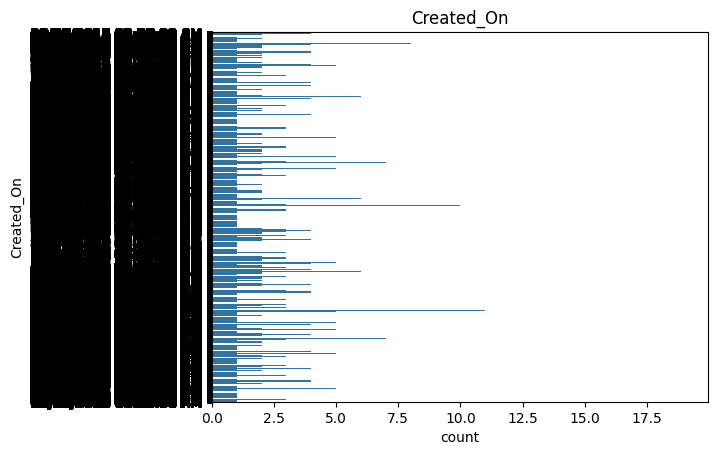

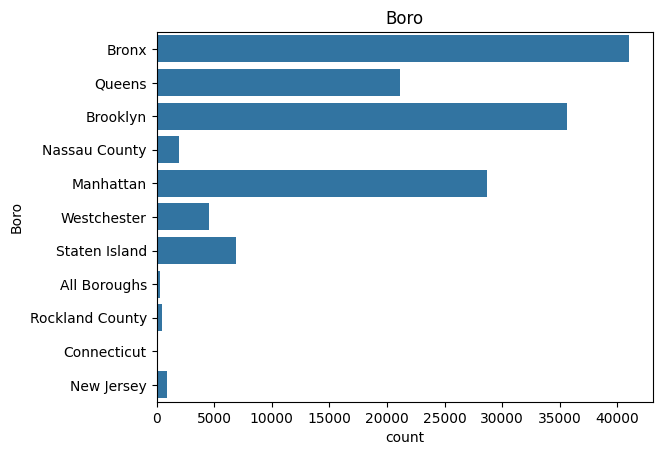

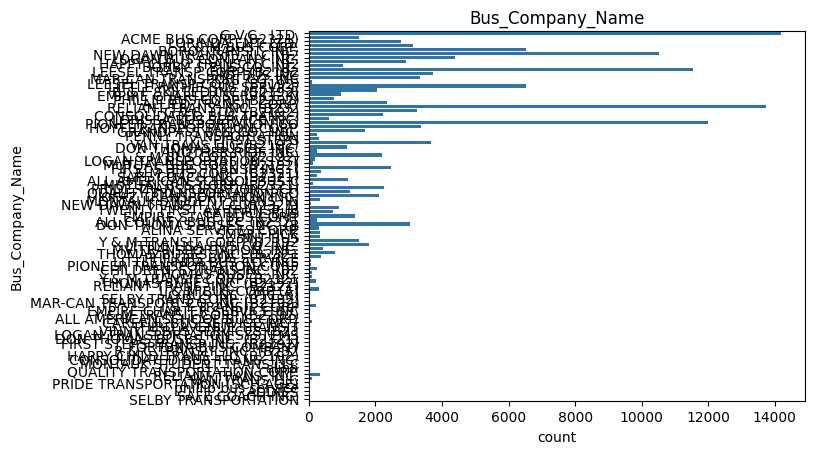

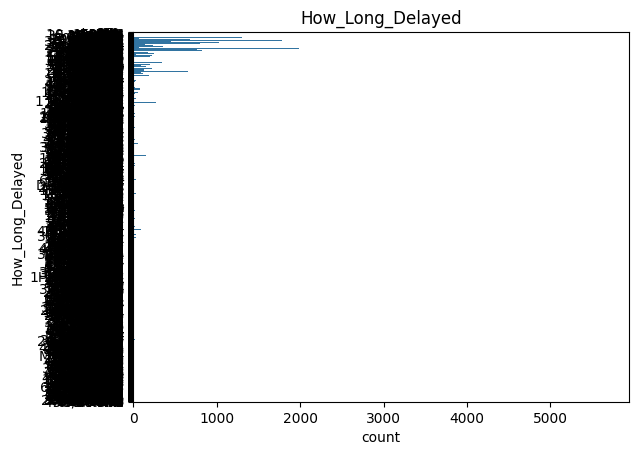

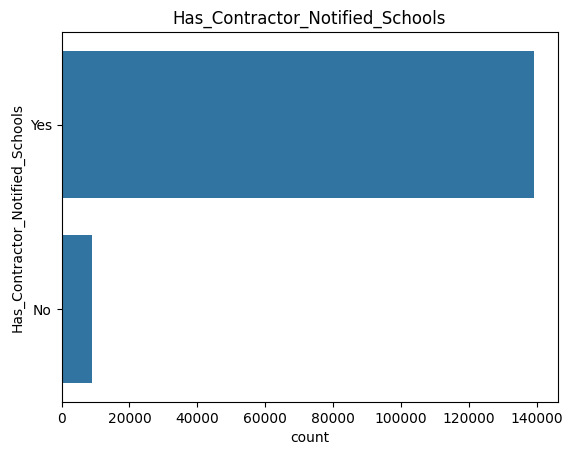

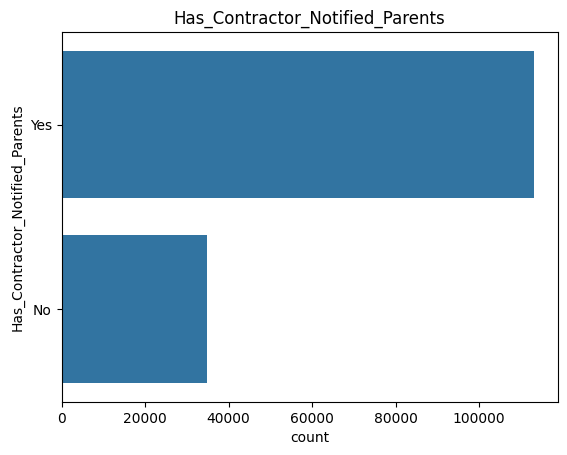

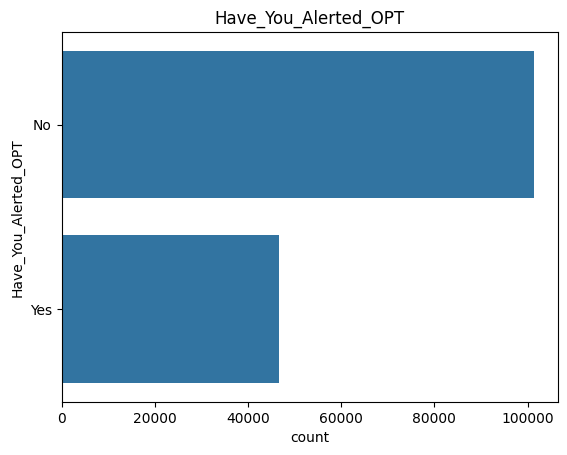

In [ ]:
# Categorical feature analysis
categoric_col = df.select_dtypes(exclude='number')
plt.figure(figsize=(10,6))
for i in categoric_col:
  sns.countplot(categoric_col[i])
  plt.title(str(i))
  plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [13]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [14]:
df['Boro'].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [15]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [16]:
df['Incident_Number'].unique() # _----> dropp

array([nan, '2725956', '2776550', ..., '90330033', '90333015', '90323827'],
      dtype=object)

In [17]:
df['Run_Type'].unique()

array(['Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', nan, 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip'], dtype=object)

In [12]:
#handling missin values
df.isnull().sum()
#mode
#How_Long_Delayed

#mean

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [18]:
df.drop('Incident_Number',axis=1,inplace=True)

In [19]:
df.isnull().sum()


,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [20]:
df['How_Long_Delayed'].mode()

,How_Long_Delayed
0,20 MINS


In [21]:
df['How_Long_Delayed'] = df['How_Long_Delayed'].fillna('20 MINS')

In [22]:
df['Boro'].mode()

,Boro
0,Bronx


In [23]:
df['Boro'] = df['Boro'].fillna('Bronx')

In [25]:
df['Run_Type'].mode()

,Run_Type
0,Special Ed AM Run


In [26]:
df['Run_Type'] = df['Run_Type'].fillna('Special Ed AM Run')

In [30]:
df['Route_Number'].mode()

,Route_Number
0,1


In [31]:
df['Route_Number'] = df['Route_Number'].fillna('1')

In [33]:
df['Reason'].mode()

,Reason
0,Heavy Traffic


In [35]:
df['Reason'] = df['Reason'].fillna('Heavy Traffic')

In [36]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [52]:
#Encode Categorical Variables
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 utes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [38]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [47]:
min = ['MINUTES','MINS','MIN','min']
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINUTES',' ')
df['How_Long_Delayed'] = df['How_Long_Delayed'].str.replace('MINS',' ')
df['How_Long_Delayed']= df['How_Long_Delayed'].str.replace('MIN',' ')
df['How_Long_Delayed']= df['How_Long_Delayed'].str.replace('min',' ')


In [53]:
# #label encoder
# School_Year
# How_Long_Delayed
# #drop
# Busbreakdown_ID
# Schools_Serviced
# Bus_Company_Name

df.drop(['Busbreakdown_ID','Schools_Serviced','Bus_Company_Name'],axis=1,inplace=True)

In [55]:
df.drop('Bus_No',axis=1,inplace=True)

In [63]:
df.head()

,School_Year,Run_Type,Route_Number,Reason,Occurred_On,Created_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,Pre-K/EI,1,Other,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,10,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,0,Pre-K/EI,1,Heavy Traffic,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,25,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,0,Pre-K/EI,2,Heavy Traffic,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,15,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,0,Pre-K/EI,2,Other,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,10 utes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,0,Pre-K/EI,2,Other,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,10,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
#Breakdown_or_Running_Late ---->target
#The dataset contains records of incidents involving buses that were either running late or experienced a breakdown
Breakdown_or_Running_Late

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
df['School_Year'] = encoder.fit_transform(df['School_Year'])

In [66]:
df['Run_Type'] = encoder.fit_transform(df['Run_Type'])

In [68]:
df['Reason'] = encoder.fit_transform(df['Reason'])

In [67]:
df['Has_Contractor_Notified_Schools'] = encoder.fit_transform(df['Has_Contractor_Notified_Schools'])

In [69]:
df['School_Age_or_PreK'] = encoder.fit_transform(df['School_Age_or_PreK'])

In [71]:
df['How_Long_Delayed'] = encoder.fit_transform(df['How_Long_Delayed'])

In [73]:
df['Boro'] = encoder.fit_transform(df['Boro'])

In [75]:
df['Has_Contractor_Notified_Parents'] = encoder.fit_transform(df['Has_Contractor_Notified_Parents'])

In [76]:
df['Have_You_Alerted_OPT'] = encoder.fit_transform(df['Have_You_Alerted_OPT'])

In [78]:
df['Breakdown_or_Running_Late'] = encoder.fit_transform(df['Breakdown_or_Running_Late'])

In [79]:
df.head()

,School_Year,Run_Type,Route_Number,Reason,Occurred_On,Created_On,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,0,3,1,6,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,1,77,5,1,1,0,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,1,0
1,0,3,1,3,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,1,743,3,1,1,0,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,1,0
2,0,3,2,3,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,1,296,12,1,1,1,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,1,0
3,0,3,2,6,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,1,93,11,1,1,1,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,1,0
4,0,3,2,6,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,1,77,12,1,1,0,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,1,0


In [80]:
df.drop(['Occurred_On','Created_On','Informed_On','Last_Updated_On'],axis=1,inplace=True)

In [89]:
df.dtypes

,0
School_Year,int64
Run_Type,int64
Route_Number,object
Reason,int64
Boro,int64
How_Long_Delayed,int64
Number_Of_Students_On_The_Bus,int64
Has_Contractor_Notified_Schools,int64
Has_Contractor_Notified_Parents,int64
Have_You_Alerted_OPT,int64


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [83]:
X =df.drop('Breakdown_or_Running_Late',axis=1)
y= df['Breakdown_or_Running_Late']

In [87]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.15)

In [94]:
X_valid,X_train = X_train_full[4000:],X_train_full[:4000]
y_valid,y_train = y_train_full[4000:], y_train_full[:4000]

In [95]:
X_train.shape

(4000, 11)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [98]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers,models,Sequential

In [104]:
from keras import layers,models,Sequential,Dense


ImportError: cannot import name 'Dense' from 'keras' (/usr/local/lib/python3.10/dist-packages/keras/__init__.py)

In [93]:
model = Sequential()

In [103]:
model.layers(Dense(units=6,kernel_intializer='uniform',activation='relu',input_dim=X_trian.shape[1]))

NameError: name 'Dense' is not defined

In [ ]:
model.layers(Dense(units=12,activation='relu'))
model.layers(Dense(units=24,activation='relu'))

In [100]:
model.layers(Dense(units=1,activation='sigmoid'))

NameError: name 'Dense' is not defined

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [101]:
model.compile(optimaizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

TypeError: Trainer.compile() got an unexpected keyword argument 'optimaizer'

## Training the Model
Train the ANN model using the training data.

In [ ]:
model.fit(X_train,y_trian,epochs=40,batch_size=1000,validation=(X_valid,y_valid))

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test,y_test)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: